In [1]:
from transformers import pipeline
import requests
from PIL import Image
from transformers import Blip2Processor, Blip2ForConditionalGeneration

In [2]:
# prompt: open the zip folder "archiv.zip" from my storage

!unzip -f "/content/drive/MyDrive/Projekt MAI/data.zip"

# prompt: list als png images in the current folder and read them in using the "Image" function, use pathlib

from pathlib import Path

# List all PNG images in the current folder
png_files = Path('.').glob('*.png')

# Read each image using the "Image" function
images = [Image.open(file) for file in png_files]

Archive:  /content/drive/MyDrive/Projekt MAI/data.zip


In [3]:
pipe = pipeline("image-to-text", model="Salesforce/blip2-opt-2.7b")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

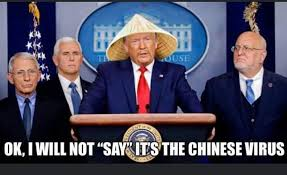

[{'generated_text': 'trump, joe, and the krusty krab\n'}]


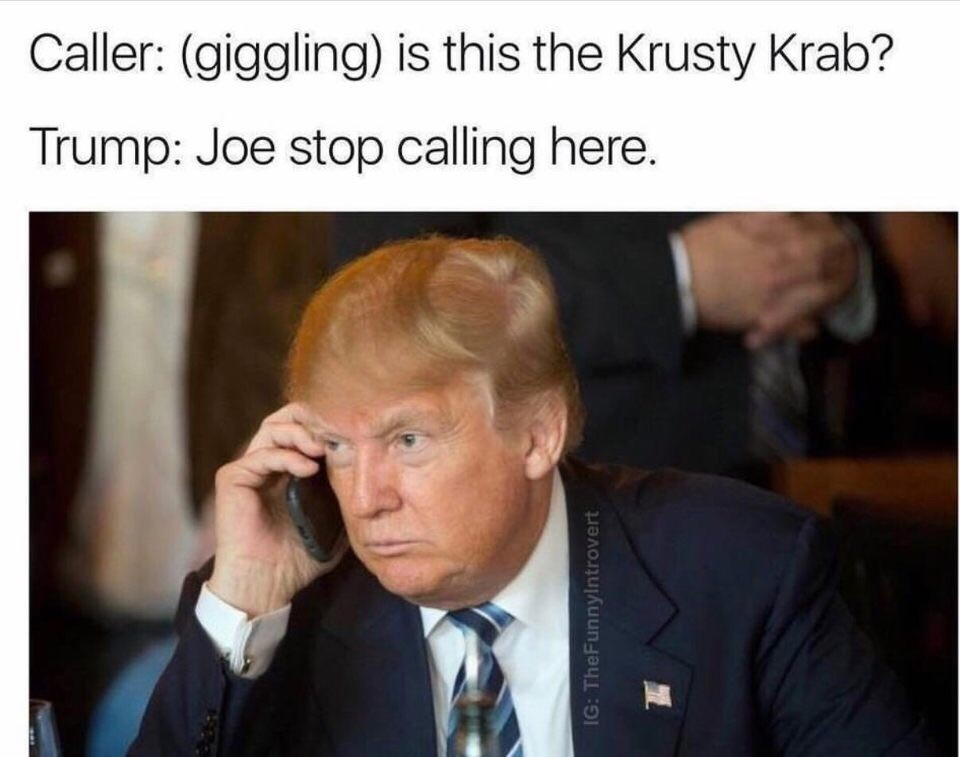

[{'generated_text': 'be libertarian - learn about libertarianism\n'}]


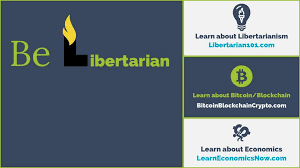

[{'generated_text': 'a man with a mustache and mustache saying republican party a fucked up punch\n'}]


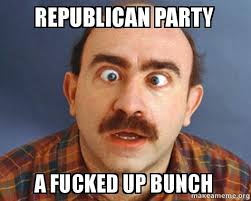

[{'generated_text': 'a screenshot of a twitter post with a picture of a man on the phone\n'}]


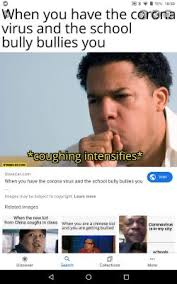

[{'generated_text': 'a dog with a helicopter in the background\n'}]


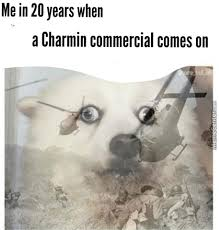

[{'generated_text': 'donald trump and hillary clinton debate memes\n'}]


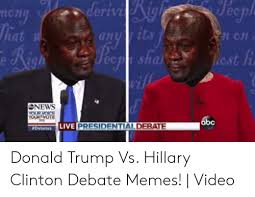

[{'generated_text': 'millennials everyday i want to die millennials when a virus hits\n'}]


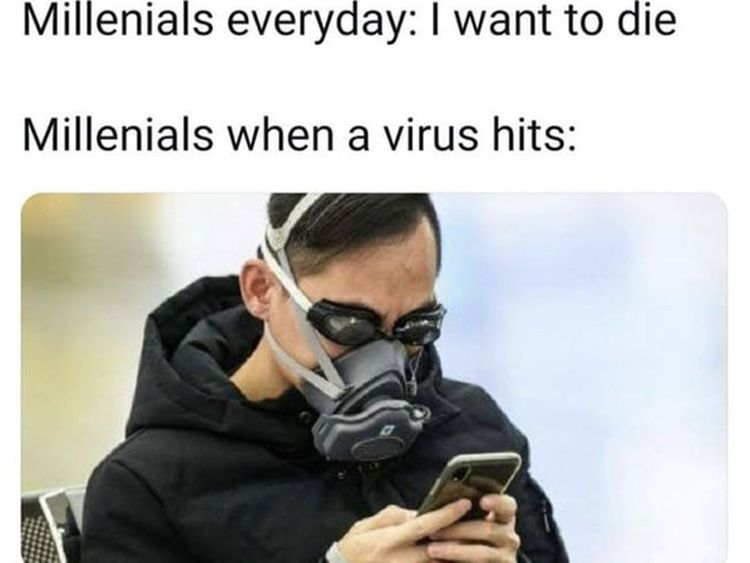

[{'generated_text': 'the rule of sordor\n'}]


In [4]:
generated_texts = pipe(images[1:10])

for image, text in zip(images[1:10], generated_texts[1:10]):
    display(image)
    print(text, flush=True)

In [9]:
del(pipe)

In [7]:
pipe = pipeline("image-to-text", model="Salesforce/blip2-opt-6.7b")

config.json:   0%|          | 0.00/6.95k [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/127k [00:00<?, ?B/s]

model-00001-of-00004.safetensors:   0%|          | 0.00/9.80G [00:00<?, ?B/s]

model-00002-of-00004.safetensors:   0%|          | 0.00/9.93G [00:00<?, ?B/s]

model-00003-of-00004.safetensors:   0%|          | 0.00/9.93G [00:00<?, ?B/s]

model-00004-of-00004.safetensors:   0%|          | 0.00/2.17G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

tokenizer_config.json:   0%|          | 0.00/904 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/548 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/432 [00:00<?, ?B/s]

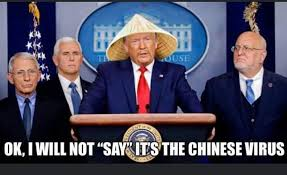

[{'generated_text': 'a man talking on the phone with the caption calling, gi - gi - g'}]


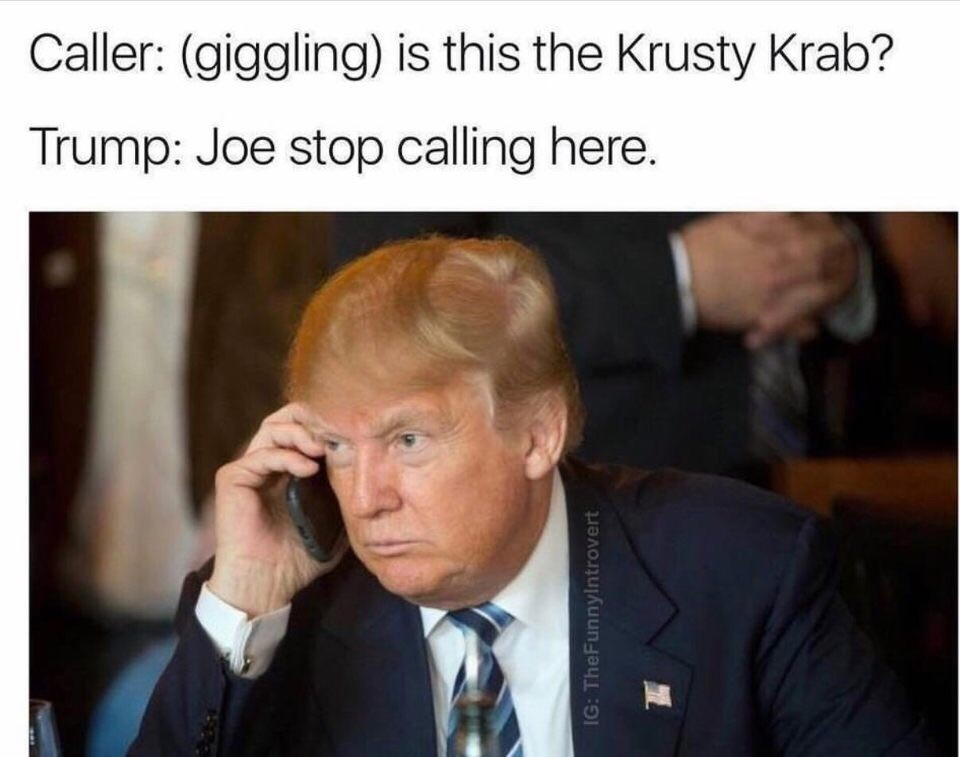

[{'generated_text': 'the logo for be libertarian\n'}]


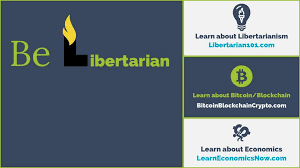

[{'generated_text': 'a man with a mustache and a caption that reads republican party a fucked up punch\n'}]


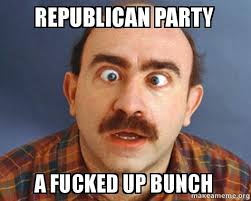

[{'generated_text': 'a screenshot of a facebook post with the caption, when you have the corona virus and'}]


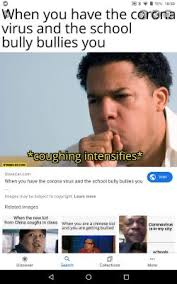

[{'generated_text': 'a dog with a caption that reads, me in 20 years when a charmin commercial comes'}]


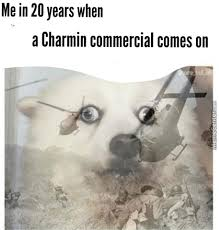

[{'generated_text': 'donald trump and hillary clinton debate videos\n'}]


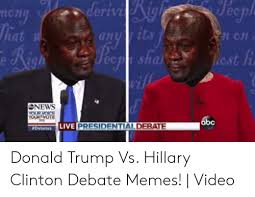

[{'generated_text': 'a man wearing a mask with text that reads millennials everyday i want to die\n'}]


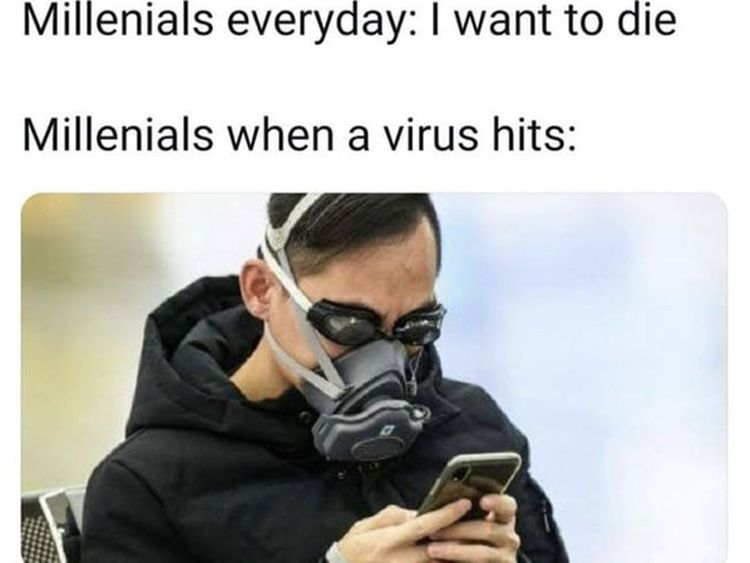

[{'generated_text': 'a man is talking to a woman in a room\n'}]


In [8]:
generated_texts = pipe(images[1:10])

for image, text in zip(images[1:10], generated_texts[1:10]):
    display(image)
    print(text, flush=True)

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


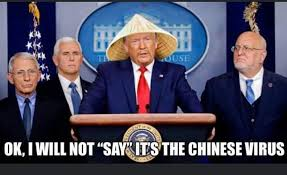

Give a very detailled description of the image: The image features a group of men standing around a podium, with one of them wearing a traditional Vietnamese hat. They are all looking at the camera, with the caption "Ok, I will not'say' it's the Chinese virus."


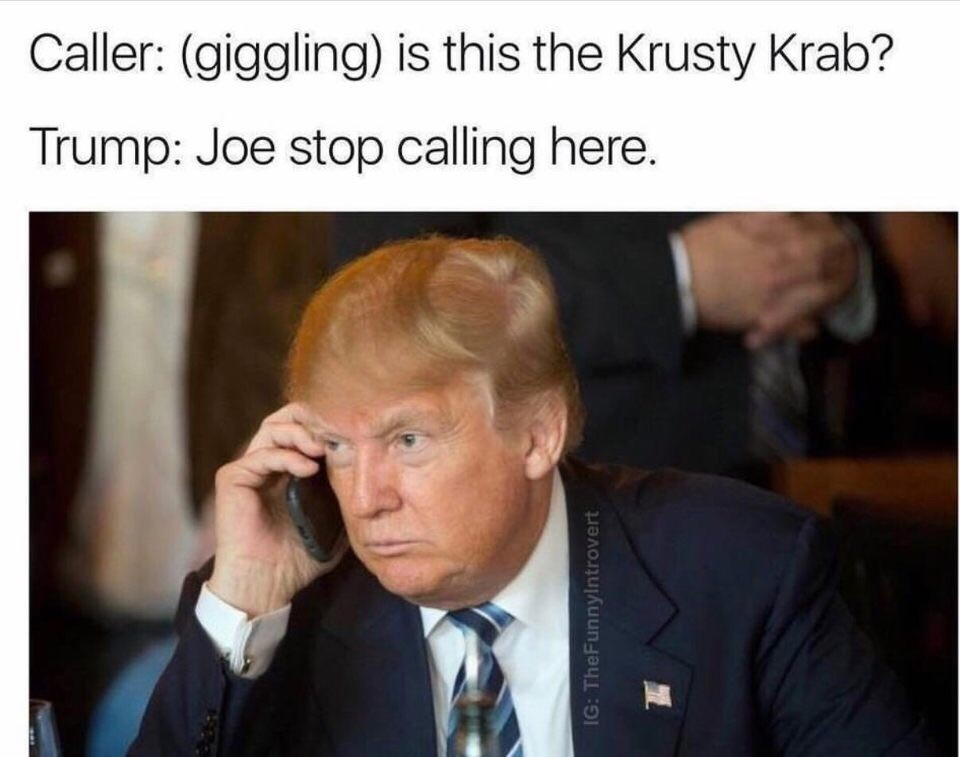

Give a very detailled description of the image: A man is talking on his cell phone, looking concerned.


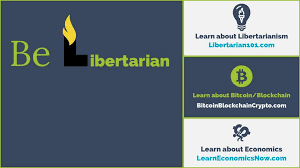

Give a very detailled description of the image: The image features a dark blue background with the word "Libertarian" in green, and a yellow flame burning in the middle. There are three logos in the image, one on the left side, one in the center, and the third one on top right. The logos are labeled "Learn about Libertarianism," "Learn About Economics," and "Learn to Bitcoin."


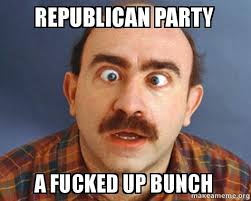

Give a very detailled description of the image: A man with a mustache is looking at the camera with wide eyes. He is wearing a plaid shirt and has a big, bushy mustache. The caption reads, "Republican Party: A fucked up bunch."


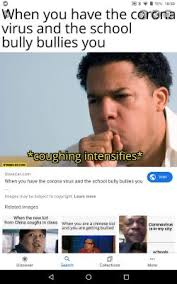

Give a very detailled description of the image: When you have the corona virus and the school bully bullies you laughing intensifies


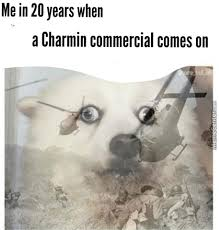

Give a very detailled description of the image: A dog is looking at a plane and a cat is peeking out from behind it.


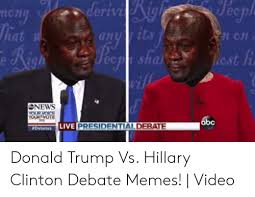

Give a very detailled description of the image: Donald Trump vs Hillary Clinton Debate Memes Video


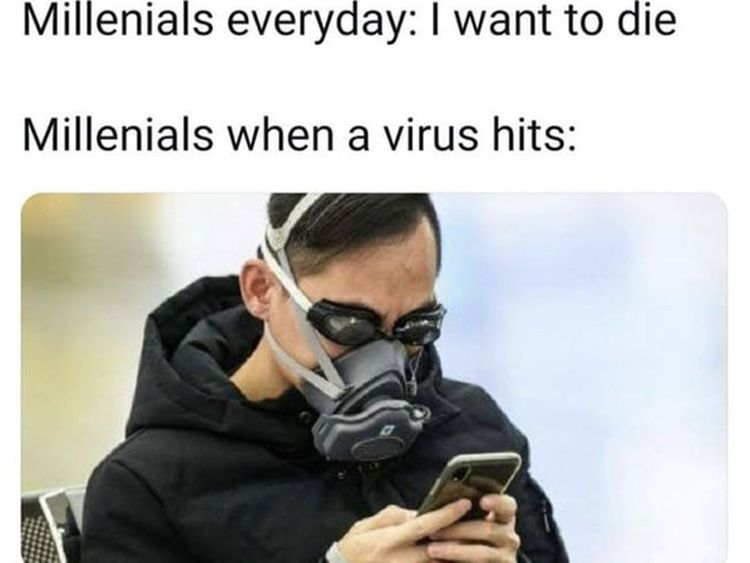

Give a very detailled description of the image: A man wearing a gas mask is looking at his phone.


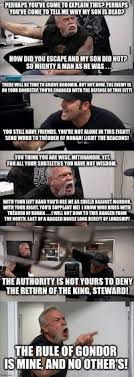

Give a very detailled description of the image: A man is standing in a room, holding a gun. He is pointing it at a woman, who is sitting on a chair. The caption reads: "The rule of condor is mine and no other's."


In [37]:
import requests

from PIL import Image
from transformers import AutoProcessor, AutoModelForVision2Seq


model = AutoModelForVision2Seq.from_pretrained("microsoft/kosmos-2-patch14-224")
processor = AutoProcessor.from_pretrained("microsoft/kosmos-2-patch14-224")

prompt = "<grounding> Give a very detailled description of the image:"

def describe_image(image):
  inputs = processor(text=prompt, images=image, return_tensors="pt")

  generated_ids = model.generate(
      pixel_values=inputs["pixel_values"],
      input_ids=inputs["input_ids"],
      attention_mask=inputs["attention_mask"],
      image_embeds=None,
      image_embeds_position_mask=inputs["image_embeds_position_mask"],
      use_cache=True,
      max_new_tokens=256,
  )
  generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
  processed_text = processor.post_process_generation(generated_text, cleanup_and_extract=False)
  processed_text, entities = processor.post_process_generation(generated_text)

  return processed_text


for image, text in zip(images[1:10], generated_texts[1:10]):
    display(image)
    print( describe_image(image), flush=True)

In [34]:
import requests
from PIL import Image
from transformers import BlipProcessor, BlipForConditionalGeneration

processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-large")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-large")

img_url = 'https://storage.googleapis.com/sfr-vision-language-research/BLIP/demo.jpg'
raw_image = Image.open(requests.get(img_url, stream=True).raw).convert('RGB')


def describe_image(image):
  # conditional image captioning
  text = "a meme of"
  inputs = processor(image, text, return_tensors="pt")

  out = model.generate(**inputs)
  print(processor.decode(out[0], skip_special_tokens=True))

  return processor.decode(out[0], skip_special_tokens=True)


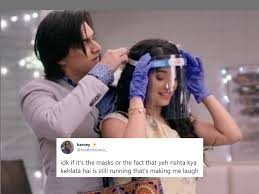

a meme of a man putting on a woman's hair


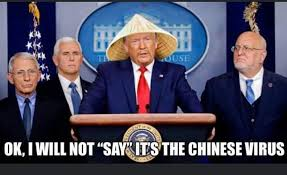

a meme of a man in a straw hat standing at a podium with other men


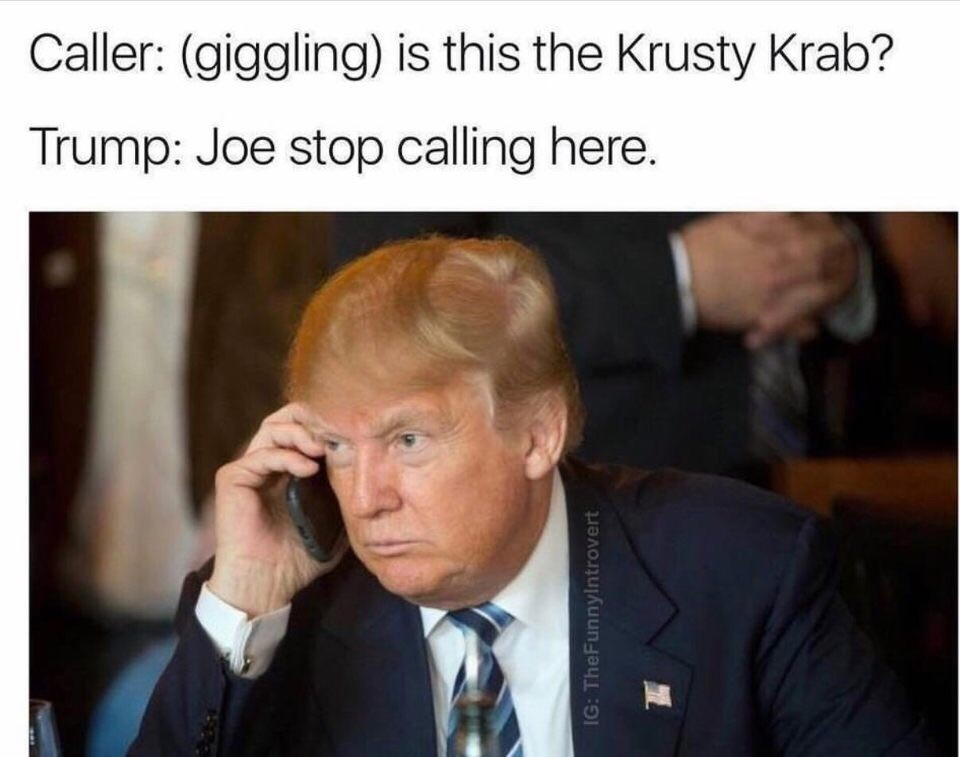

a meme of a man in a suit talking on a cell phone


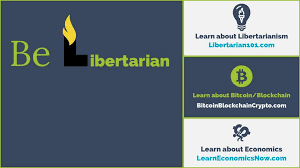

a meme of logos for the be libertarianian


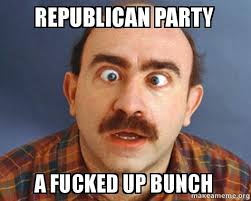

a meme of a man with a mustache and a mustache on his head


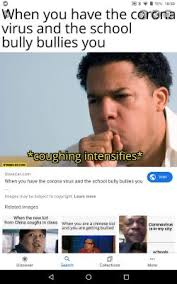

a meme of a man with a finger on his lips


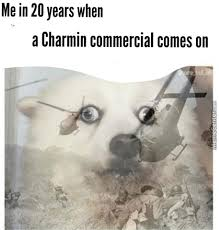

a meme of a dog with a gun in its mouth


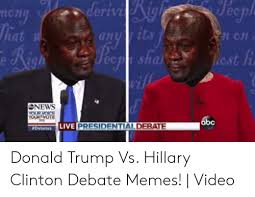

a meme of a man and a woman on a debate stage


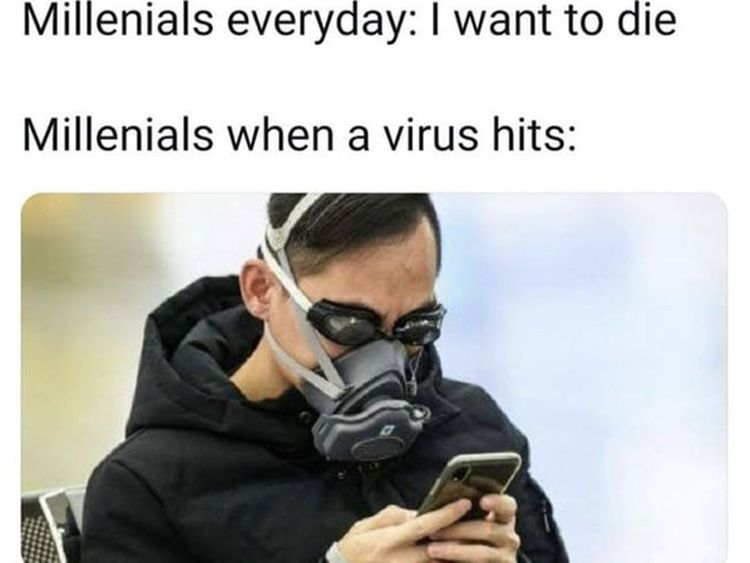

a meme of a man wearing a gas mask and holding a cell phone


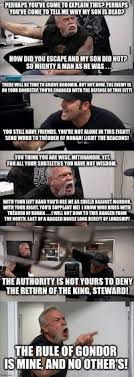

a meme of a man in a kitchen with a bunch of words


In [36]:
for image, text in zip(images[0:10], generated_texts[0:10]):
    display(image)
    test = describe_image(image)